In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
sns.set_context('talk')

plt.rcParams['font.family'] = "Ubuntu"
vcolor = '#582c83'

In [62]:
df = pd.read_csv("./Files/ew19_wbz/ew19_wbz_ergebnisse.csv", skiprows=4, delimiter=';', encoding="ISO-8859-1")

/home/guimas/anaconda3/envs/volt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (5,57) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [63]:
df.columns

Index(['Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde', 'Gemeinde',
       'Kennziffer Briefwahlzugehörigkeit', 'Wahlbezirk', 'Bezirksart',
       'Wahlberechtigte (A)', 'Wahlberechtigte ohne Sperrvermerk (A1)',
       'Wahlberechtigte mit Sperrvermerk (A2)',
       'Wahlberechtigte nach § 24 Abs. 2 EuWO (A3)', 'Wähler (B)',
       'Wähler mit Wahlschein (B1)', 'Ungültig', 'Gültig', 'CDU', 'SPD',
       'GRÜNE', 'DIE LINKE', 'AfD', 'CSU', 'FDP', 'FREIE WÄHLER', 'PIRATEN',
       'Tierschutzpartei', 'NPD', 'FAMILIE', 'ÖDP', 'Die PARTEI',
       'Volksabstimmung', 'BP', 'DKP', 'MLPD', 'SGP', 'TIERSCHUTZ hier!',
       'Tierschutzallianz', 'Bündnis C', 'BIG', 'BGE', 'DIE DIREKTE!',
       'DiEM25', 'III. Weg', 'Die Grauen', 'DIE RECHTE', 'DIE VIOLETTEN',
       'LIEBE', 'DIE FRAUEN', 'Graue Panther', 'LKR', 'MENSCHLICHE WELT', 'NL',
       'ÖkoLinX', 'Die Humanisten', 'PARTEI FÜR DIE TIERE',
       'Gesundheitsforschung', 'Volt', 'Ungekürzte Wahlbezirksbezeichnung'],
      dtype='

In [90]:
df.head()

,Land,Regierungsbezirk,Kreis,Verbandsgemeinde,Gemeinde,Kennziffer Briefwahlzugehörigkeit,Wahlbezirk,Bezirksart,Wahlberechtigte (A),Wahlberechtigte ohne Sperrvermerk (A1),...,Graue Panther,LKR,MENSCHLICHE WELT,NL,ÖkoLinX,Die Humanisten,PARTEI FÜR DIE TIERE,Gesundheitsforschung,Volt,Ungekürzte Wahlbezirksbezeichnung
0,1,0,3,0,0,0,000608,0,1185,1076,...,0,0,0,0,0,0,1,1,5,NaN
1,1,0,3,0,0,0,000609,0,636,609,...,0,0,0,0,1,0,0,0,2,NaN
2,1,0,3,0,0,0,000610,0,1623,1399,...,7,0,0,0,0,2,4,1,7,NaN
3,1,0,3,0,0,0,000611,0,1604,1484,...,1,1,0,0,0,4,2,1,1,NaN
4,1,0,3,0,0,0,000612,0,1583,1421,...,4,1,0,0,0,0,1,0,4,NaN


In [188]:
df.iloc[:,16:57].to_csv("./Files/justVotes.csv", index=False)

In [182]:
df.Land.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [65]:
len(df)

86887

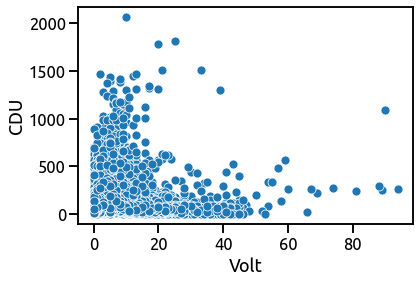

In [4]:
sns.scatterplot(x='Volt', y='CDU', data=df)

In [5]:
df.columns

Index(['Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde', 'Gemeinde',
       'Kennziffer Briefwahlzugehörigkeit', 'Wahlbezirk', 'Bezirksart',
       'Wahlberechtigte (A)', 'Wahlberechtigte ohne Sperrvermerk (A1)',
       'Wahlberechtigte mit Sperrvermerk (A2)',
       'Wahlberechtigte nach § 24 Abs. 2 EuWO (A3)', 'Wähler (B)',
       'Wähler mit Wahlschein (B1)', 'Ungültig', 'Gültig', 'CDU', 'SPD',
       'GRÜNE', 'DIE LINKE', 'AfD', 'CSU', 'FDP', 'FREIE WÄHLER', 'PIRATEN',
       'Tierschutzpartei', 'NPD', 'FAMILIE', 'ÖDP', 'Die PARTEI',
       'Volksabstimmung', 'BP', 'DKP', 'MLPD', 'SGP', 'TIERSCHUTZ hier!',
       'Tierschutzallianz', 'Bündnis C', 'BIG', 'BGE', 'DIE DIREKTE!',
       'DiEM25', 'III. Weg', 'Die Grauen', 'DIE RECHTE', 'DIE VIOLETTEN',
       'LIEBE', 'DIE FRAUEN', 'Graue Panther', 'LKR', 'MENSCHLICHE WELT', 'NL',
       'ÖkoLinX', 'Die Humanisten', 'PARTEI FÜR DIE TIERE',
       'Gesundheitsforschung', 'Volt', 'Ungekürzte Wahlbezirksbezeichnung'],
      dtype='

In [6]:
df.Kreis.nunique()

88

In [121]:
lb = pd.read_csv("./Files/ew19_wbz/ew19_wbz_leitband.csv", skiprows=4, delimiter=';', encoding="ISO-8859-1")

In [124]:
lb.Satzart.nunique(), lb.Textkennzeichen.nunique(), lb.Name.nunique(), df['Wahlberechtigte (A)'].nunique()

(5, 27, 12461, 2371)

In [154]:
lb.head(30)

,Satzart,Land,Regierungsbezirk,Kreis,Verbandsgemeinde,Gemeinde,Kennziffer Briefwahlzugehörigkeit,Name,Textkennzeichen
0,10,1,0,0,0,0,0,Schleswig-Holstein,11
1,10,2,0,0,0,0,0,Hamburg,11
2,10,3,0,0,0,0,0,Niedersachsen,11
3,10,4,0,0,0,0,0,Bremen,11
4,10,5,0,0,0,0,0,Nordrhein-Westfalen,11
5,10,6,0,0,0,0,0,Hessen,11
6,10,7,0,0,0,0,0,Rheinland-Pfalz,11
7,10,8,0,0,0,0,0,Baden-Württemberg,11
8,10,9,0,0,0,0,0,Bayern,11
9,10,10,0,0,0,0,0,Saarland,11


In [180]:
lb.groupby(['Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde', 'Gemeinde', 'Kennziffer Briefwahlzugehörigkeit'])['Name'].agg(['nunique'])

nunique    2
dtype: int64

In [171]:
lb['Name'].nunique()

12461

In [169]:
len(lb[['Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde', 'Gemeinde','Kennziffer Briefwahlzugehörigkeit']].drop_duplicates())

5452

In [181]:
len(lb.groupby(['Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde', 'Gemeinde','Kennziffer Briefwahlzugehörigkeit']))

13047

In [153]:
lb.Land.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [126]:
len(lb[['Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde', 'Gemeinde', 'Kennziffer Briefwahlzugehörigkeit']].drop_duplicates()), len(lb.drop_duplicates())

(13047, 13168)

In [127]:
lb.Kreis.nunique()

88

In [11]:
lb.Name.nunique()

12461

In [128]:
lb[lb.Name=='GVV Rauenberg']

,Satzart,Land,Regierungsbezirk,Kreis,Verbandsgemeinde,Gemeinde,Kennziffer Briefwahlzugehörigkeit,Name,Textkennzeichen
912,50,8,2,26,5006,0,0,GVV Rauenberg,56


---

In [115]:
df.columns

Index(['Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde', 'Gemeinde',
       'Kennziffer Briefwahlzugehörigkeit', 'Wahlbezirk', 'Bezirksart',
       'Wahlberechtigte (A)', 'Wahlberechtigte ohne Sperrvermerk (A1)',
       'Wahlberechtigte mit Sperrvermerk (A2)',
       'Wahlberechtigte nach § 24 Abs. 2 EuWO (A3)', 'Wähler (B)',
       'Wähler mit Wahlschein (B1)', 'Ungültig', 'Gültig', 'CDU', 'SPD',
       'GRÜNE', 'DIE LINKE', 'AfD', 'CSU', 'FDP', 'FREIE WÄHLER', 'PIRATEN',
       'Tierschutzpartei', 'NPD', 'FAMILIE', 'ÖDP', 'Die PARTEI',
       'Volksabstimmung', 'BP', 'DKP', 'MLPD', 'SGP', 'TIERSCHUTZ hier!',
       'Tierschutzallianz', 'Bündnis C', 'BIG', 'BGE', 'DIE DIREKTE!',
       'DiEM25', 'III. Weg', 'Die Grauen', 'DIE RECHTE', 'DIE VIOLETTEN',
       'LIEBE', 'DIE FRAUEN', 'Graue Panther', 'LKR', 'MENSCHLICHE WELT', 'NL',
       'ÖkoLinX', 'Die Humanisten', 'PARTEI FÜR DIE TIERE',
       'Gesundheitsforschung', 'Volt', 'Ungekürzte Wahlbezirksbezeichnung'],
      dtype='

In [116]:
lb.columns

Index(['Satzart', 'Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde',
       'Gemeinde', 'Kennziffer Briefwahlzugehörigkeit', 'Name',
       'Textkennzeichen'],
      dtype='object')

---

### Variables to make the merge, sanity check

In [43]:
df.Land.unique().sort() == lb.Land.unique().sort()

True

In [44]:
df.Regierungsbezirk.unique().sort() == lb.Regierungsbezirk.unique().sort()

True

In [45]:
df.Kreis.unique().sort() == lb.Kreis.unique().sort()

True

In [54]:
np.all(np.sort(df.Verbandsgemeinde.unique()) == np.sort(lb.Verbandsgemeinde.unique()))

True

In [55]:
np.all(np.sort(df.Gemeinde.unique()) == np.sort(lb.Gemeinde.unique()))

True

In [149]:
#minilb = lb[['Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde', 'Gemeinde', 'Kennziffer Briefwahlzugehörigkeit', 'Name']]
minilb = lb[['Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde', 'Kennziffer Briefwahlzugehörigkeit', 'Name']]

minilb.head()

,Land,Regierungsbezirk,Kreis,Verbandsgemeinde,Kennziffer Briefwahlzugehörigkeit,Name
0,1,0,0,0,0,Schleswig-Holstein
1,2,0,0,0,0,Hamburg
2,3,0,0,0,0,Niedersachsen
3,4,0,0,0,0,Bremen
4,5,0,0,0,0,Nordrhein-Westfalen


In [150]:
#udf = pd.merge(df, minilb, on=['Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde', 'Gemeinde', 'Kennziffer Briefwahlzugehörigkeit'])
udf = pd.merge(df, minilb, on=['Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde', 'Kennziffer Briefwahlzugehörigkeit'])
#udf.drop_duplicates(inplace=True)
#len(udf), len(df)

In [151]:
len(udf), len(df), len(lb)

(243075, 86887, 13168)

In [132]:
df.Volt.sum(), udf.Volt.sum()

(249098, 303092)

In [133]:
len(lb), len(lb.drop_duplicates())

(13168, 13168)

In [134]:
udf.head()

,Land,Regierungsbezirk,Kreis,Verbandsgemeinde,Gemeinde,Kennziffer Briefwahlzugehörigkeit,Wahlbezirk,Bezirksart,Wahlberechtigte (A),Wahlberechtigte ohne Sperrvermerk (A1),...,LKR,MENSCHLICHE WELT,NL,ÖkoLinX,Die Humanisten,PARTEI FÜR DIE TIERE,Gesundheitsforschung,Volt,Ungekürzte Wahlbezirksbezeichnung,Name
0,1,0,3,0,0,0,000608,0,1185,1076,...,0,0,0,0,0,1,1,5,NaN,"Lübeck, Hansestadt"
1,1,0,3,0,0,0,000608,0,1185,1076,...,0,0,0,0,0,1,1,5,NaN,"Lübeck, Hansestadt"
2,1,0,3,0,0,0,000609,0,636,609,...,0,0,0,1,0,0,0,2,NaN,"Lübeck, Hansestadt"
3,1,0,3,0,0,0,000609,0,636,609,...,0,0,0,1,0,0,0,2,NaN,"Lübeck, Hansestadt"
4,1,0,3,0,0,0,000610,0,1623,1399,...,0,0,0,0,2,4,1,7,NaN,"Lübeck, Hansestadt"


In [135]:
len(df), len(udf)

(86887, 88994)

In [138]:
lb[lb.Name=='GVV Rauenberg']

,Satzart,Land,Regierungsbezirk,Kreis,Verbandsgemeinde,Gemeinde,Kennziffer Briefwahlzugehörigkeit,Name,Textkennzeichen
912,50,8,2,26,5006,0,0,GVV Rauenberg,56


In [146]:
df[(df.Land==8) & (df.Regierungsbezirk==2) & (df.Kreis==26) & (df.Verbandsgemeinde==5006) & (df.Gemeinde==54) & (df['Kennziffer Briefwahlzugehörigkeit']==0)]

,Land,Regierungsbezirk,Kreis,Verbandsgemeinde,Gemeinde,Kennziffer Briefwahlzugehörigkeit,Wahlbezirk,Bezirksart,Wahlberechtigte (A),Wahlberechtigte ohne Sperrvermerk (A1),...,Graue Panther,LKR,MENSCHLICHE WELT,NL,ÖkoLinX,Die Humanisten,PARTEI FÜR DIE TIERE,Gesundheitsforschung,Volt,Ungekürzte Wahlbezirksbezeichnung
46807,8,2,26,5006,54,0,001-01,0,840,633,...,0,0,0,0,0,0,2,0,2,"Mühlhausen Rathaus, Schulstr. 6- Zimmer 15"
46808,8,2,26,5006,54,0,001-02,0,768,638,...,0,2,0,0,0,0,0,0,1,"Mühlhausen Rathaus, Schulstr. 6- Zimmer 16"
46809,8,2,26,5006,54,0,001-03,0,947,776,...,0,0,0,0,0,0,0,0,0,"Mühlhausen Rathaus, Schulstr. 6- Zimmer 12"
46810,8,2,26,5006,54,0,001-04,0,899,735,...,0,1,0,0,1,0,0,0,3,"Mühlhausen Bürgerhaus, Schulstraße 6-Mehrzweck..."
46811,8,2,26,5006,54,0,002-05,0,1170,963,...,3,0,0,0,2,1,3,0,14,"Mühlhausen Gemeindezentrum Rettigheim, Malsche..."
46812,8,2,26,5006,54,0,002-06,0,759,622,...,2,0,0,0,0,2,3,0,2,"Mühlhausen Feuerwehrunterrichtsraum, Gartenstr..."
46813,8,2,26,5006,54,0,003-07,0,913,763,...,0,0,1,0,0,1,2,1,0,"Mühlhausen Schloßgebäude Tairnbach, Sternweile..."
46814,8,2,26,5006,54,0,900-01,5,0,0,...,0,3,2,1,0,0,3,2,3,"Mühlhausen Rathaus, Schulstraße 6- Zimmer 25 B..."
46815,8,2,26,5006,54,0,900-02,5,0,0,...,0,1,0,0,0,0,3,1,2,"Mühlhausen Rathaus, Schulstraße 6- Sitzungssaa..."


In [148]:
lb.Gemeinde[lb.Gemeinde==54]

2376     54
2501     54
2621     54
2847     54
2930     54
3221     54
3315     54
4023     54
4230     54
5236     54
5323     54
5441     54
5562     54
5655     54
5818     54
6029     54
6163     54
6350     54
6466     54
6694     54
6924     54
7039     54
7202     54
7297     54
7401     54
7468     54
7527     54
7557     54
7633     54
7953     54
8048     54
8126     54
8213     54
8252     54
8407     54
8533     54
11188    54
11453    54
11552    54
11633    54
11770    54
12587    54
12750    54
12852    54
12979    54
13047    54
Name: Gemeinde, dtype: int64